In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, SimpleRNN, LSTM, GRU, Dense, Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)


17464789/17464789 [==============================] - 0s 0us/step


In [17]:
model_lstm = Sequential()
model_lstm.add(Embedding(10000, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_lstm = model_lstm.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.3, verbose=0)

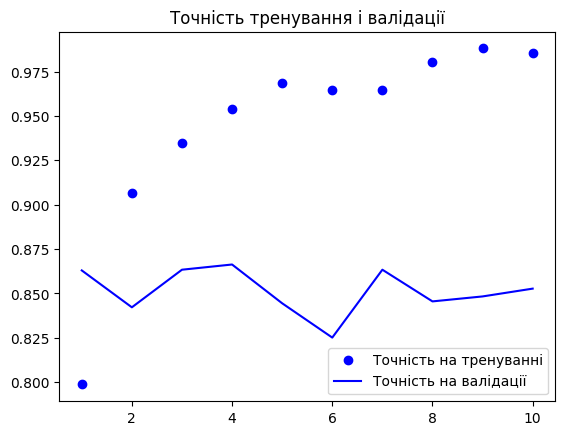

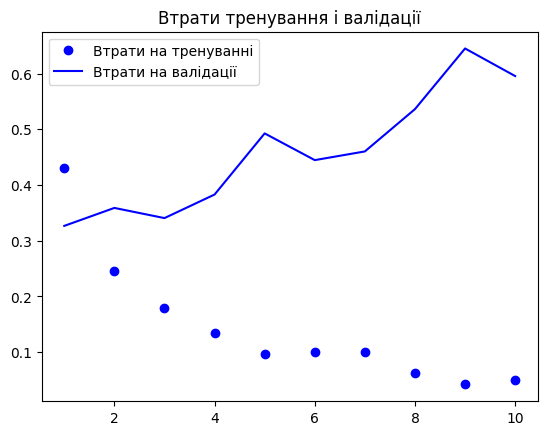

In [18]:
import matplotlib.pyplot as plt

acc = history_lstm.history['accuracy']
val_acc = history_lstm.history['val_accuracy']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [19]:
model_gru = Sequential()
model_gru.add(Embedding(10000, 32))
model_gru.add(GRU(32))
model_gru.add(Dense(1, activation='sigmoid'))

model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_gru = model_gru.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.3, verbose=0)

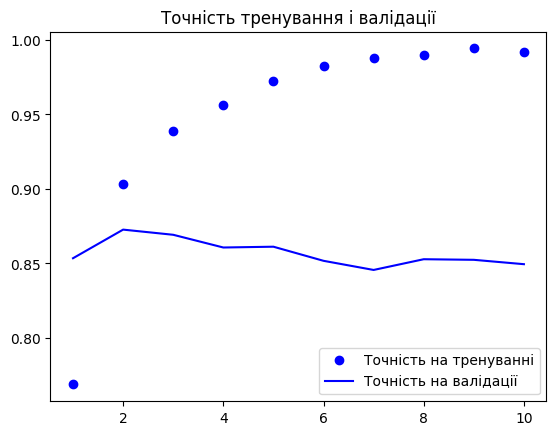

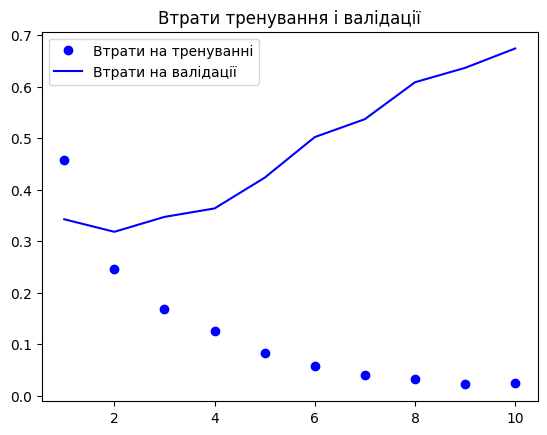

In [4]:
import matplotlib.pyplot as plt

acc = history_gru.history['accuracy']
val_acc = history_gru.history['val_accuracy']
loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [5]:
model_bidirectional_rnn = Sequential()
model_bidirectional_rnn.add(Embedding(10000, 32))
model_bidirectional_rnn.add(Bidirectional(SimpleRNN(32)))
model_bidirectional_rnn.add(Dense(1, activation='sigmoid'))

model_bidirectional_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_bidirectional_rnn = model_bidirectional_rnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.3, verbose=0)

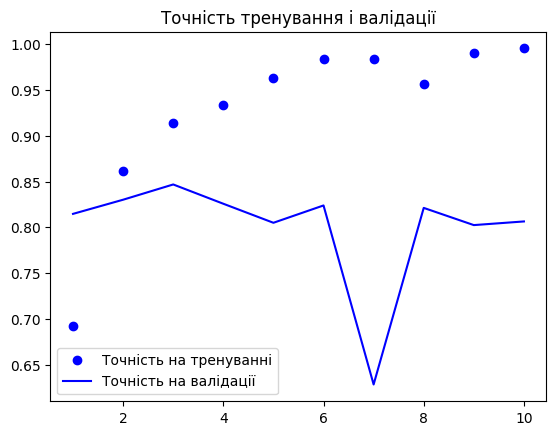

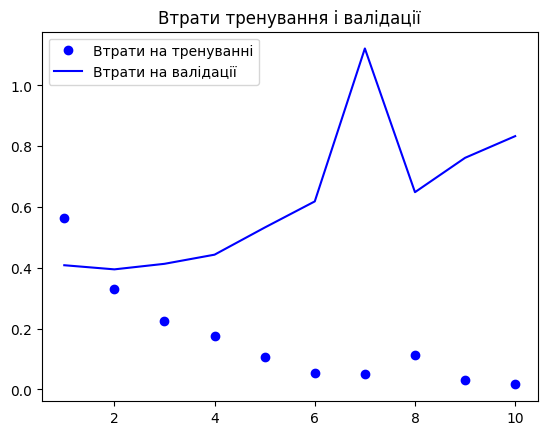

In [6]:
import matplotlib.pyplot as plt

acc = history_bidirectional_rnn.history['accuracy']
val_acc = history_bidirectional_rnn.history['val_accuracy']
loss = history_bidirectional_rnn.history['loss']
val_loss = history_bidirectional_rnn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [14]:
model_deep_rnn = Sequential()
model_deep_rnn.add(Embedding(10000, 32))
model_deep_rnn.add(SimpleRNN(32, return_sequences=True))
model_deep_rnn.add(SimpleRNN(32))
model_deep_rnn.add(Dense(1, activation='sigmoid'))

model_deep_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_deep_rnn = model_deep_rnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.3, verbose=0)

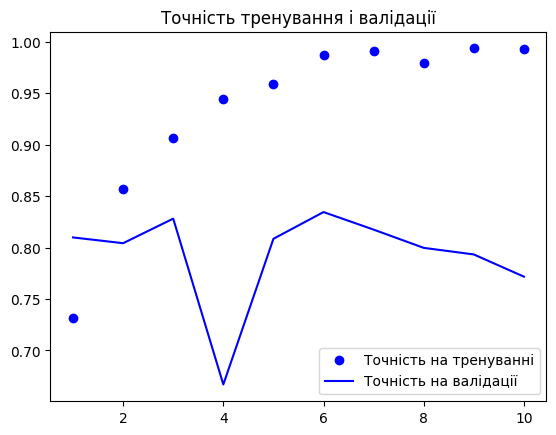

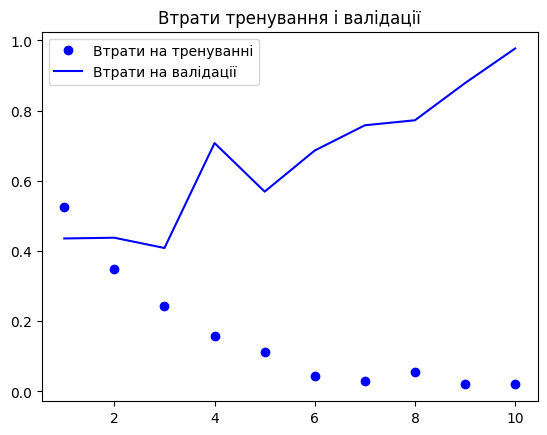

In [15]:
acc = history_deep_rnn.history['accuracy']
val_acc = history_deep_rnn.history['val_accuracy']
loss = history_deep_rnn.history['loss']
val_loss = history_deep_rnn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [20]:
score_lstm = model_lstm.evaluate(x_test, y_test, verbose=0)

score_gru = model_gru.evaluate(x_test, y_test, verbose=0)

score_bidirectional_rnn = model_bidirectional_rnn.evaluate(x_test, y_test, verbose=0)

score_deep_rnn = model_deep_rnn.evaluate(x_test, y_test, verbose=0)

print("LSTM Test Loss:", score_lstm[0])
print("LSTM Test Accuracy:", score_lstm[1])

print("GRU Test Loss:", score_gru[0])
print("GRU Test Accuracy:", score_gru[1])

print("Bidirectional RNN Test Loss:", score_bidirectional_rnn[0])
print("Bidirectional RNN Test Accuracy:", score_bidirectional_rnn[1])

print("Deep RNN Test Loss:", score_deep_rnn[0])
print("Deep RNN Test Accuracy:", score_deep_rnn[1])

LSTM Test Loss: 0.6284034252166748
LSTM Test Accuracy: 0.8448799848556519
GRU Test Loss: 0.7364360690116882
GRU Test Accuracy: 0.8361600041389465
Bidirectional RNN Test Loss: 0.8329941630363464
Bidirectional RNN Test Accuracy: 0.8082399964332581
Deep RNN Test Loss: 0.9683557748794556
Deep RNN Test Accuracy: 0.7678400278091431


LSTM показав найкращий результат з точністю близько 84.5 на тестових даних. GRU близько 83.6 відцотків. Враховуючи малу кількість епох для навчання, це не погані результатию

Bidirectional RNN відпрацював з точністю близько 80.8%.
Deep RNN показав найгірший результат з точністю 76.8, що свідчить про те, що в цьому випадку більше глибоких шарів не допомогли покращити результати.

Таким чинов, що LSTM і GRU справилися краще з завданням аналізу рецензій на IMDb порівняно з іншими типами рекурентних мереж.